In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from cosmikyu import config, datasets, transforms, stats, utils
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data_dir = "/home/dwhan89/workspace/cosmikyu/data/sehgal"
def data_path(x):
    return os.path.join(data_dir, x)

model_hist = utils.load_data(data_path("normalized_histogram_modelv2.npz"))
model_pdfcdf = {} 
for key in model_hist:
    total_val = np.sum(model_hist[key]["hist"])
    model_pdfcdf[key] = {"x": model_hist[key]["bin_centers"],
                      "pdf": model_hist[key]["hist"]/total_val,
                      "cdf": np.cumsum(model_hist[key]["hist"]/total_val)}
    
np.savez(data_path("normalized_pdfcdf_modelv2.npz"), **model_pdfcdf)

0 kappa
1 ksz
2 tsz
3 ir_pts
4 rad_pts


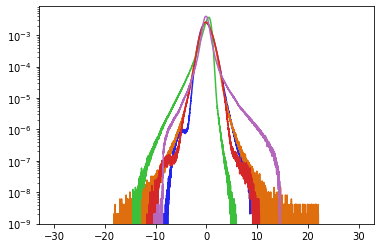

In [3]:
channel_idxes = ["kappa", "ksz", "tsz", "ir_pts", "rad_pts"]
nchannel = len(channel_idxes)
interpolators = [None]*nchannel
funcs = [None]*nchannel

def f(x, *args):
    y, intp = args
    return intp(x) - y
fsolve_wrapper = lambda y, intp: fsolve(f, 0.,  args=(y, intp))

for i in range(nchannel):
    idx = channel_idxes[i]
    print(i, idx)
    interpolators[i] = interp1d(model_pdfcdf[idx]['x'], model_pdfcdf[idx]['cdf'], bounds_error=False, fill_value=(0,1), assume_sorted=True)
    plt.plot(model_pdfcdf[idx]['x'], model_pdfcdf[idx]['pdf'])
    plt.yscale("log")
    #samplers[i] = lambda y, intp: fsolve(f, 0.,  args=(y, intp))
    

[0.17632549 0.054249   0.09751769 0.92280771 0.46580383 0.59045313
 0.56635365 0.56033559 0.17651629 0.39399688 0.92444507 0.33717893
 0.14417005 0.46286597 0.2418665  0.23120527 0.69001904 0.32373722
 0.84611175 0.32926273 0.28929247 0.91419576 0.70844129 0.76030456
 0.68000313 0.88990333 0.33589103 0.40630639 0.27670032 0.27279852
 0.98285148 0.01662297 0.62345017 0.4883175  0.87289218 0.47974244
 0.92808703 0.6490059  0.7644962  0.31660958 0.54709832 0.03205312
 0.9379571  0.47746962 0.77503748 0.26854694 0.84093163 0.99828574
 0.25911319 0.35214782 0.50410248 0.22647845 0.12081374 0.23359951
 0.10164151 0.67065629 0.10009773 0.19284311 0.91386381 0.47394075
 0.199573   0.45141484 0.74069332 0.94692268 0.0932251  0.04796707
 0.93538093 0.19253413 0.99307192 0.22181306 0.17117091 0.63320823
 0.25372205 0.14430766 0.17670134 0.83023427 0.53441486 0.42689674
 0.64171727 0.10630085 0.14949753 0.80729008 0.73568973 0.210124
 0.86341437 0.00272039 0.62842158 0.44206001 0.84888682 0.547089

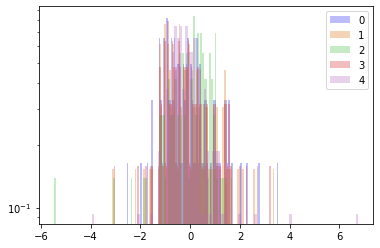

In [6]:
x = np.random.uniform(0,1, 100)
print(x)

for j in range(5):
    print(j)
    y = np.zeros(len(x))
    for i in range(len(x)):
        y[i] = fsolve_wrapper(x[i], interpolators[j])
    plt.hist(y, bins=100, density=True, alpha=0.3, label=j)
plt.yscale("log")
plt.legend()

(array([4.50323654e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.50323654e-04, 4.50323654e-04, 4.50323654e-04, 4.50323654e-04,
        4.50323654e-04, 0.00000000e+00, 9.00647307e-04, 0.00000000e+00,
        0.00000000e+00, 1.80129461e-03, 9.00647307e-04, 2.70194192e-03,
        2.25161827e-03, 1.35097096e-03, 2.70194192e-03, 3.15226558e-03,
        2.70194192e-03, 5.85420750e-03, 8.10582577e-03, 9.90712038e-03,
        1.03574440e-02, 9.45679673e-03, 1.80129461e-02, 2.16155354e-02,
        3.19729794e-02, 4.27807471e-02, 8.73627888e-02, 1.27441594e-01,
        2.06248233e-01, 3.55305363e-01, 5.40838708e-01, 6.34055704e-01,
        6.64677713e-01, 5.72361364e-01, 3.87278342e-01, 2.43625097e-01,
        1.45454540e-01, 8.78131125e-02, 5.98930459e-02, 4.00788052e-02,
        2.79200665e-02, 2.02645644e-02, 1.75626225e-02, 1.35097096e-02,
        1.17084150e-02, 1.08077677e-02, 8.10582577e-03, 1.03574440e-02,
        6.30453115e-03, 4.50323654e-03, 4.05291288e-03, 4.503236

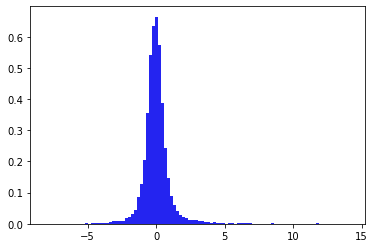

In [148]:

#plt.plot(model_pdfcdf[key]["x"], model_pdfcdf[key]["pdf"])

In [137]:
plt.hist??